# Multilabel classification

In [1]:
#Importing the necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv("train.csv")
train_df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [3]:
test_df = pd.read_csv("test.csv")
test_df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,...,0,0,0,0,0,0,0,0,0,0
1,3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,...,0,0,0,0,0,0,0,0,0,0
2,4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,...,0,0,0,0,0,0,0,0,0,0
3,9,1,A1,26,0.151709,2,1,1,0.522388,0.654545,...,0,0,0,0,0,0,0,0,1,1
4,12,1,A1,26,0.076923,2,3,1,0.298507,0.672727,...,0,0,0,0,0,0,0,0,0,0


In [4]:
submission_df = pd.read_csv("sample_submission.csv")
submission_df.head()

,Id,Response
0,1,8
1,3,8
2,4,8
3,9,8
4,12,8


# Exploratory data analysis

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


In [6]:
train_df.columns

Index(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7',
       'Ins_Age', 'Ht',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response'],
      dtype='object', length=128)

In [7]:
train_df.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [8]:
train_df.shape

(59381, 128)

In [9]:
train_df.isna().any().sum()

13

In [10]:
missing_columns = train_df[train_df.columns[train_df.isna().any()]].columns
missing_columns

Index(['Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6',
       'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3',
       'Family_Hist_4', 'Family_Hist_5', 'Medical_History_1',
       'Medical_History_10', 'Medical_History_15', 'Medical_History_24',
       'Medical_History_32'],
      dtype='object')

In [11]:
train_df["Response"].value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

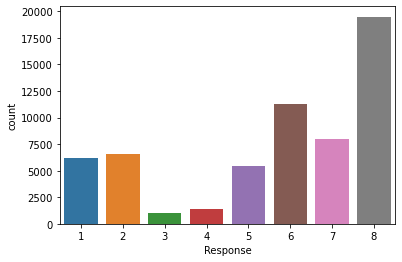

In [12]:
sns.countplot(x = train_df.Response);

From this we will understood Response is high and response 3 is lower..

In [13]:
train_df.corr()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Id,1.000000,-0.002870,-0.001869,-0.002914,-0.004195,0.005038,0.002117,0.001764,0.003674,0.005648,...,-0.001746,0.005721,-0.004575,-0.007633,0.001917,-0.000286,0.002684,0.001199,-0.001122,0.000462
Product_Info_1,-0.002870,1.000000,0.027573,0.059829,0.069720,-0.078684,0.012169,-0.077429,0.052720,-0.004035,...,-0.002782,0.004495,-0.007697,-0.014055,-0.008247,-0.006719,-0.010638,0.004402,-0.008469,0.014692
Product_Info_3,-0.001869,0.027573,1.000000,0.048775,0.025419,-0.018855,0.015581,0.001005,0.293546,0.213546,...,-0.039359,-0.000005,-0.036560,0.034787,0.002696,-0.053305,-0.001538,-0.017001,0.045862,-0.067432
Product_Info_4,-0.002914,0.059829,0.048775,1.000000,0.040433,-0.089075,0.051542,-0.261356,0.141780,-0.028041,...,-0.021352,-0.015152,-0.041935,-0.039131,-0.002671,-0.019914,-0.047318,-0.021974,-0.030896,0.202434
Product_Info_5,-0.004195,0.069720,0.025419,0.040433,1.000000,-0.045840,0.019435,0.006543,0.054495,0.022393,...,-0.008326,0.011878,-0.005644,0.001135,-0.004944,-0.002885,-0.005534,-0.000320,0.004904,-0.001486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Medical_Keyword_45,-0.000286,-0.006719,-0.053305,-0.019914,-0.002885,-0.002870,0.002267,0.043924,-0.062366,-0.027579,...,0.014192,-0.000252,0.033351,-0.006628,-0.000201,1.000000,0.003317,0.002923,0.017043,0.004852
Medical_Keyword_46,0.002684,-0.010638,-0.001538,-0.047318,-0.005534,0.002609,0.008825,0.114839,0.012234,0.073164,...,0.012907,0.012757,0.024699,0.022474,0.013181,0.003317,1.000000,0.026243,0.061895,-0.054693
Medical_Keyword_47,0.001199,0.004402,-0.017001,-0.021974,-0.000320,-0.009493,0.014242,0.062636,-0.012682,0.016217,...,0.021684,0.017060,0.046946,0.021482,0.021066,0.002923,0.026243,1.000000,0.044397,-0.060104
Medical_Keyword_48,-0.001122,-0.008469,0.045862,-0.030896,0.004904,-0.003590,0.031756,0.138007,0.102564,0.235822,...,0.040558,0.017451,0.067131,0.062229,0.016858,0.017043,0.061895,0.044397,1.000000,-0.159557


# Data preprocessing

In [14]:
train_df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [15]:
from sklearn.model_selection import train_test_split

#Creating dependent and independent feature
X = train_df.drop("Response", axis=1)
y = train_df.Response

#Setting seed for reproducablity
np.random.seed(42)

#Splitting data for training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

#Taking categorical and numerical columns
categorical_col = [col for col in X.columns if X[col].dtype=="O"]

numerical_col = [col for col in X.columns if X[col].dtype!="O"]

In [16]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((47504, 127), (11877, 127), (47504,), (11877,))

In [17]:
categorical_col

['Product_Info_2']

In [18]:
missing_columns

Index(['Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6',
       'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3',
       'Family_Hist_4', 'Family_Hist_5', 'Medical_History_1',
       'Medical_History_10', 'Medical_History_15', 'Medical_History_24',
       'Medical_History_32'],
      dtype='object')

From this we will understand there is no missing values in categorical column but there is missing value in numerical columns.

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer =OneHotEncoder(handle_unknown="ignore")

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_col),
        ('cat', categorical_transformer, categorical_col)
    ])

In [20]:
#Scaling
scalar = StandardScaler()
scalar1 = MinMaxScaler()

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [22]:
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('sacalar',scalar1),
                              ('model', model)
                             ])

In [23]:
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['Id', 'Product_Info_1',
                                                   'Product_Info_3',
                                                   'Product_Info_4',
                                                   'Product_Info_5',
                                                   'Product_Info_6',
                                                   'Product_Info_7', 'Ins_Age',
                                                   'Ht', 'Wt', 'BMI',
                                                   'Employment_Info_1',
                                                   'Employment_Info_2',
                                                   'Employment_Info_3',
                                                   'Employment_Info_4',
                                   

In [24]:
model = my_pipeline.score(X_valid, y_valid)
model

0.5512334764671213

In [34]:
from xgboost import XGBClassifier

model1 = XGBClassifier()

In [40]:
my_pipeline1 = Pipeline(steps=[('preprocessor', preprocessor),
                              ('scalar',scalar1),
                              ('model', model1)
                             ])

TypeError: Last step of Pipeline should implement fit or be the string 'passthrough'. '0.5833964805927423' (type <class 'numpy.float64'>) doesn't

In [36]:
my_pipeline1.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:04:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['Id', 'Product_Info_1',
                                                   'Product_Info_3',
                                                   'Product_Info_4',
                                                   'Product_Info_5',
                                                   'Product_Info_6',
                                                   'Product_Info_7', 'Ins_Age',
                                                   'Ht', 'Wt', 'BMI',
                                                   'Employment_Info_1',
                                                   'Employment_Info_2',
                                                   'Employment_Info_3',
                                                   'Employment_Info_4',
                                   

In [37]:
model1 = my_pipeline1.score(X_valid, y_valid)
model1

0.5833964805927423

In [38]:
model, model1

(0.5512334764671213, 0.5833964805927423)

In [39]:
from sklearn.linear_model import SGDClassifier
model2 = SGDClassifier()

In [42]:
my_pipeline2 = Pipeline(steps=[('preprocessor', preprocessor),
                              ('scalar',scalar1),
                              ('model', model2)
                             ])

In [44]:
my_pipeline2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['Id', 'Product_Info_1',
                                                   'Product_Info_3',
                                                   'Product_Info_4',
                                                   'Product_Info_5',
                                                   'Product_Info_6',
                                                   'Product_Info_7', 'Ins_Age',
                                                   'Ht', 'Wt', 'BMI',
                                                   'Employment_Info_1',
                                                   'Employment_Info_2',
                                                   'Employment_Info_3',
                                                   'Employment_Info_4',
                                   

In [46]:
model2 = my_pipeline2.score(X_valid, y_valid)
model2

0.4629957059863602

In [47]:
model1,model2,model

(0.5833964805927423, 0.4629957059863602, 0.5512334764671213)